In [19]:
# Analyze session logs

In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
LOG_PATH = ROOT / "app/logs"

NameError: name 'ROOT' is not defined

In [3]:
recent_history = '{"recent_history": [{"sim_time": "2023-02-13 19:30", "summary": "Eddy Lin is at home:office doing review_assignments about Developing a new musical composition inspired by the layered rhythmic structures of academic deadlines and lecture delivery. ; while drifting (internal) toward Developing a new musical composition inspired by the layered rhythmic structures of academic deadlines and lecture delivery. ; (Eddy continues assignment review, deeply focused on translating academic structures into musical concepts, particularly polyrhythms.) ; Eddy is reviewing assignments, internally developing a musical composition based on academic deadlines and lecture rhythms."}, {"sim_time": "2023-02-13 19:45", "summary": "Eddy Lin is at Oak_Hill_College:music_practice_room doing compose_music about Translating academic rhythms into musical phrases for composition. ; (Eddy is composing music, translating academic rhythms into musical phrases, actively engaged.) ; Eddy continues composing music, translating academic rhythms into musical phrases for his composition project."}, {"sim_time": "2023-02-13 20:00", "summary": "Eddy Lin is at Oak_Hill_College:music_practice_room doing compose_music about Experimenting with different chord voicings and inversions to enhance the emotional impact of the rhythmic motifs. ; (Eddy is composing music, developing harmonic progressions for his composition project.) ; Eddy experiments with chord voicings and inversions to enhance the emotional impact of rhythmic motifs in his composition."}, {"sim_time": "2023-02-13 20:15", "summary": "Eddy Lin is at Oak_Hill_College:music_practice_room doing compose_music about Continue exploring chord voicings and inversions for composition. ; (Eddy is focused on composing music, experimenting with harmonic and rhythmic elements for his project.) ; Eddy continues composing music, exploring chord voicings and inversions for his project."}, {"sim_time": "2023-02-13 20:30", "summary": "Eddy Lin is at Oak_Hill_College:music_practice_room doing compose_music about Continue melodic development and rhythmic integration for composition. ; (Eddy is stably composing music, integrating academic rhythms and exploring melodic development.) ; Eddy continues composing, developing melodic lines and integrating academic rhythmic inspirations into his music."}], "current_datetime": "2023-02-13 20:45"}'
json.loads(recent_history)

{'recent_history': [{'sim_time': '2023-02-13 19:30',
   'summary': 'Eddy Lin is at home:office doing review_assignments about Developing a new musical composition inspired by the layered rhythmic structures of academic deadlines and lecture delivery. ; while drifting (internal) toward Developing a new musical composition inspired by the layered rhythmic structures of academic deadlines and lecture delivery. ; (Eddy continues assignment review, deeply focused on translating academic structures into musical concepts, particularly polyrhythms.) ; Eddy is reviewing assignments, internally developing a musical composition based on academic deadlines and lecture rhythms.'},
  {'sim_time': '2023-02-13 19:45',
   'summary': 'Eddy Lin is at Oak_Hill_College:music_practice_room doing compose_music about Translating academic rhythms into musical phrases for composition. ; (Eddy is composing music, translating academic rhythms into musical phrases, actively engaged.) ; Eddy continues composing mus

In [4]:
import json
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

ROOT = Path.cwd().parents[1]
print(ROOT)

if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))
from app.src.metrics import detect_inherent_drift

sns.set(style="whitegrid")

# -----------------------------------------------------
# LOAD LOGS
# -----------------------------------------------------

LOG_DIR = ROOT / "app/logs"
print(LOG_DIR)

def load_logs(log_dir):
    rows = []
    for f in log_dir.glob("session_*.log"):
        with f.open() as fh:
            for line in fh:
                try:
                    rows.append(json.loads(line))
                except:
                    pass
    return pd.DataFrame(rows)

df = load_logs(LOG_DIR)
df

# Split ORPDA and ORPA
df_orpda = df[df["use_drift"] == True].copy()
df_orpa  = df[df["use_drift"] == False].copy()
print("ORPDA: ", df_orpda.shape[0], "ORPA: ", df_orpa.shape[0])

# -----------------------------------------------------
# Drift detection (inherent drift)
# -----------------------------------------------------


df["detected"] = df.apply(lambda r: detect_inherent_drift(r), axis=1)
df["drift_type_inferred"] = df["detected"].apply(lambda d: d["drift_type_inferred"])
df["drift_score"] = df["detected"].apply(lambda d: d["drift_score"])
df["inherent_drift"] = df["detected"].apply(lambda d: d["inherent_drift"])

df_orpda = df[df.use_drift == True]
df_orpa  = df[df.use_drift == False]


/Users/jaelinlee/Documents/GitHub/A2A_chat
/Users/jaelinlee/Documents/GitHub/A2A_chat/app/logs
ORPDA:  180 ORPA:  180


In [5]:
df_orpa[df_orpa.inherent_drift==True]

,ts_created,tick,sim_time,agent,use_drift,orpda,detected,drift_type_inferred,drift_score,inherent_drift
0,2025-12-01T18:06:48.976822-05:00,0,2023-02-13 06:00,John Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.0927...",behavioral,9.275094e-02,True
1,2025-12-01T18:06:57.528100-05:00,1,2023-02-13 06:15,John Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.2484...",behavioral,2.484947e-01,True
4,2025-12-01T18:07:34.416647-05:00,4,2023-02-13 07:00,John Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.2051...",behavioral,2.051806e-01,True
8,2025-12-01T18:08:17.207305-05:00,8,2023-02-13 08:00,John Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.2064...",internal,2.064575e-01,True
9,2025-12-01T18:08:26.130618-05:00,9,2023-02-13 08:15,John Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.3100...",behavioral,3.100376e-01,True
...,...,...,...,...,...,...,...,...,...,...
282,2025-12-01T14:41:45.169337-05:00,42,2023-02-13 16:30,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 1.0000...",behavioral,1.000003e-08,True
290,2025-12-01T14:43:03.146950-05:00,50,2023-02-13 18:30,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1933...",behavioral,1.933323e-01,True
292,2025-12-01T14:43:19.040238-05:00,52,2023-02-13 19:00,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1908...",behavioral,1.908266e-01,True
298,2025-12-01T14:44:20.360088-05:00,58,2023-02-13 20:30,Mei Lin,False,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.2247...",behavioral,2.247590e-01,True


In [6]:
df_orpda[df_orpda.inherent_drift==True]

,ts_created,tick,sim_time,agent,use_drift,orpda,detected,drift_type_inferred,drift_score,inherent_drift
65,2025-12-01T16:51:44.430869-05:00,5,2023-02-13 07:15,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 1.0000...",behavioral,1.000002e-08,True
71,2025-12-01T16:52:26.986742-05:00,11,2023-02-13 08:45,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1315...",behavioral,1.315270e-01,True
73,2025-12-01T16:52:40.348704-05:00,13,2023-02-13 09:15,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1298...",behavioral,1.298786e-01,True
79,2025-12-01T16:54:03.696520-05:00,19,2023-02-13 10:45,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.0965...",internal,9.651093e-02,True
81,2025-12-01T16:54:20.516438-05:00,21,2023-02-13 11:15,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1011...",internal,1.011268e-01,True
86,2025-12-01T16:55:06.676980-05:00,26,2023-02-13 12:30,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1489...",behavioral,1.489753e-01,True
87,2025-12-01T16:55:15.856184-05:00,27,2023-02-13 12:45,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1446...",internal,1.446599e-01,True
88,2025-12-01T16:55:26.014011-05:00,28,2023-02-13 13:00,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1296...",behavioral,1.296704e-01,True
89,2025-12-01T16:55:34.899339-05:00,29,2023-02-13 13:15,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1394...",internal,1.394674e-01,True
91,2025-12-01T16:55:57.383240-05:00,31,2023-02-13 13:45,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,"{'inherent_drift': True, 'drift_score': 0.1027...",internal,1.027907e-01,True


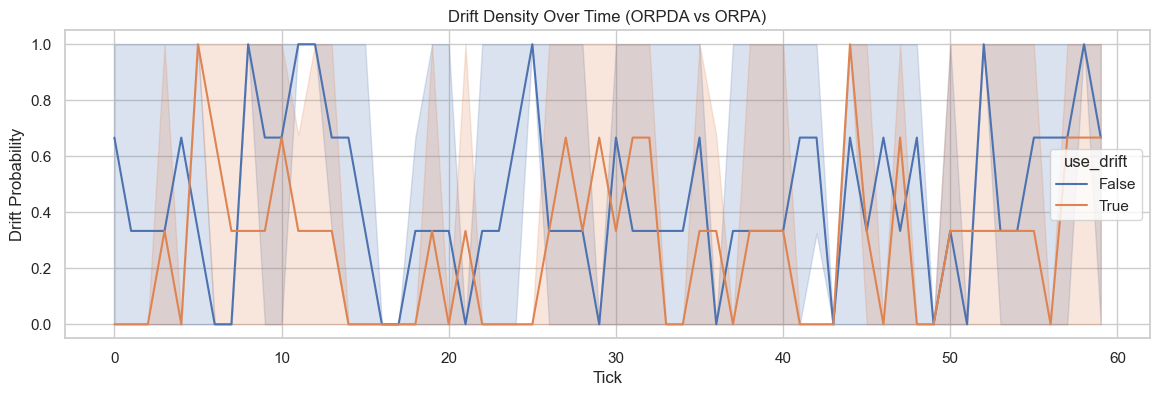

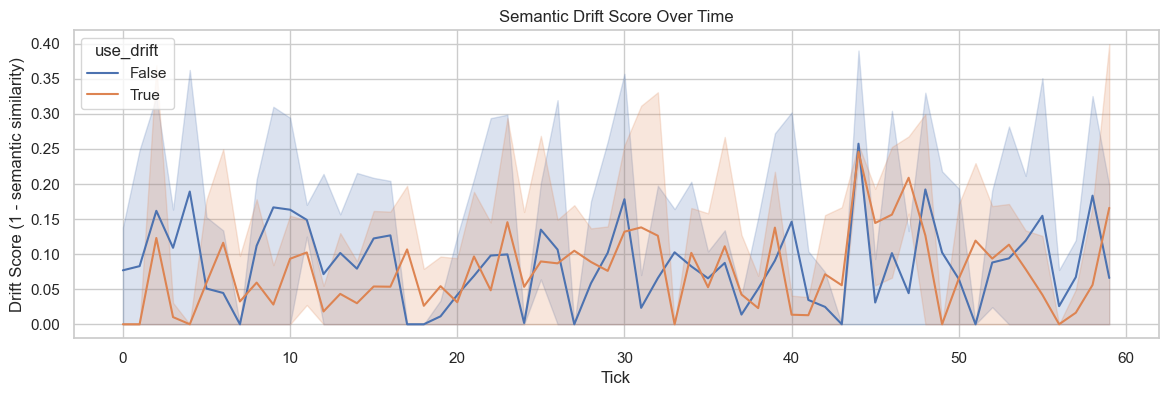

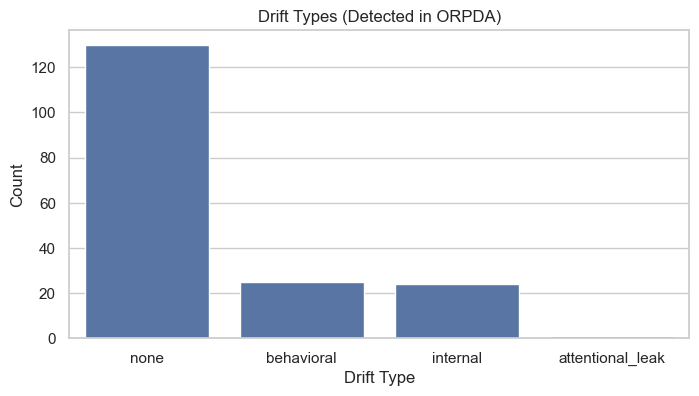

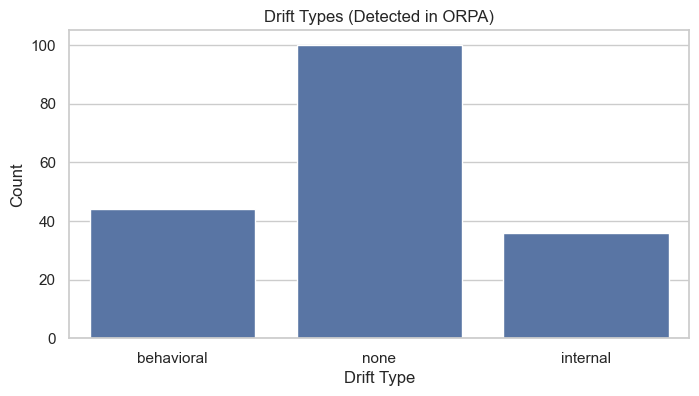

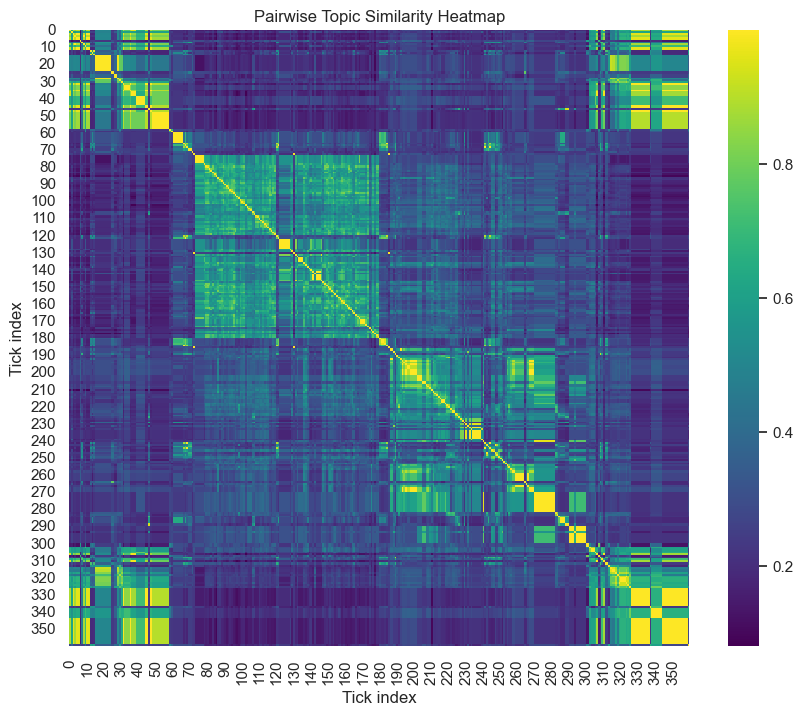

In [7]:
# -----------------------------------------------------
# A. Drift Density Timeline
# -----------------------------------------------------
plt.figure(figsize=(14,4))
sns.lineplot(data=df, x="tick", y="inherent_drift", hue="use_drift", estimator="mean")
plt.title("Drift Density Over Time (ORPDA vs ORPA)")
plt.ylabel("Drift Probability")
plt.xlabel("Tick")
plt.show()

# -----------------------------------------------------
# B. Semantic Drift Score Over Time
# -----------------------------------------------------
plt.figure(figsize=(14,4))
sns.lineplot(data=df, x="tick", y="drift_score", hue="use_drift", estimator="mean")
plt.title("Semantic Drift Score Over Time")
plt.ylabel("Drift Score (1 - semantic similarity)")
plt.xlabel("Tick")
plt.show()

# -----------------------------------------------------
# C. Drift Type Distribution
# -----------------------------------------------------
plt.figure(figsize=(8,4))
sns.countplot(data=df[df.use_drift==True], x="drift_type_inferred")
plt.title("Drift Types (Detected in ORPDA)")
plt.xlabel("Drift Type")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df[df.use_drift==False], x="drift_type_inferred")
plt.title("Drift Types (Detected in ORPA)")
plt.xlabel("Drift Type")
plt.ylabel("Count")
plt.show()


# -----------------------------------------------------
# D. Pairwise Topic Shift Heatmap
# -----------------------------------------------------
def extract_topics(row):
    try:
        return row["orpda"]["action_result"].get("topic")
    except:
        return None

df["topic"] = df.apply(extract_topics, axis=1)
topics = df["topic"].dropna().tolist()

# embed topics
from app.src.embedding_utils import embed_texts
vecs = embed_texts(topics)

# compute pairwise similarity
mat = np.zeros((len(vecs), len(vecs)))
for i in range(len(vecs)):
    for j in range(len(vecs)):
        a = np.array(vecs[i])
        b = np.array(vecs[j])
        mat[i,j] = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)+1e-8)

plt.figure(figsize=(10,8))
sns.heatmap(mat, cmap="viridis")
plt.title("Pairwise Topic Similarity Heatmap")
plt.xlabel("Tick index")
plt.ylabel("Tick index")
plt.show()


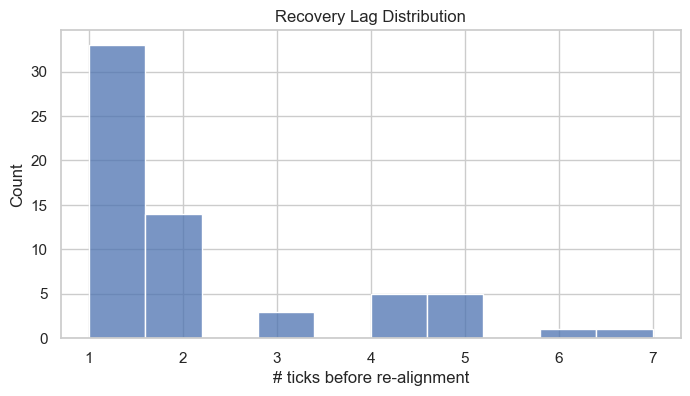

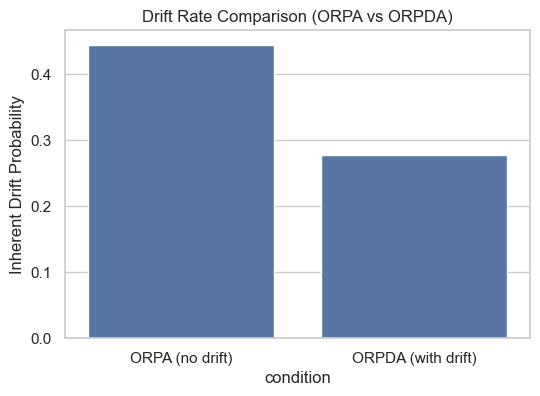

In [8]:
# -----------------------------------------------------
# E. Recovery Lag Distribution
# -----------------------------------------------------
# Tick difference between drift event and next "aligned" plan match
lags = []
current_lag = 0

for _, row in df.iterrows():
    if row["inherent_drift"]:
        current_lag += 1
    else:
        if current_lag > 0:
            lags.append(current_lag)
            current_lag = 0

plt.figure(figsize=(8,4))
sns.histplot(lags, bins=10)
plt.title("Recovery Lag Distribution")
plt.xlabel("# ticks before re-alignment")
plt.ylabel("Count")
plt.show()

# -----------------------------------------------------
# F. Drift Probability Comparison
# -----------------------------------------------------
comp = pd.DataFrame({
    "condition": ["ORPA (no drift)", "ORPDA (with drift)"],
    "drift_rate": [
        df_orpa["inherent_drift"].mean(),
        df_orpda["inherent_drift"].mean()
    ]
})

plt.figure(figsize=(6,4))
sns.barplot(data=comp, x="condition", y="drift_rate")
plt.title("Drift Rate Comparison (ORPA vs ORPDA)")
plt.ylabel("Inherent Drift Probability")
plt.show()